## Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('heart - heart.csv')
df.head()

,age,gender,cp,trtbps,chol,fbs,thalachh,exng,caa,output
0,63,1,3,145,233,1,150,0,0,1
1,37,1,2,130,250,0,187,0,0,1
2,41,0,1,130,204,0,172,0,0,1
3,56,1,1,120,236,0,178,0,0,1
4,57,0,0,120,354,0,163,1,0,1


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   gender    303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   thalachh  303 non-null    int64
 7   exng      303 non-null    int64
 8   caa       303 non-null    int64
 9   output    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


In [4]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
duplicate = df[df.duplicated()]
duplicate

,age,gender,cp,trtbps,chol,fbs,thalachh,exng,caa,output
164,38,1,2,138,175,0,173,0,4,1


In [6]:
data = df.drop_duplicates()

<AxesSubplot:title={'center':'Correlation Plot'}>

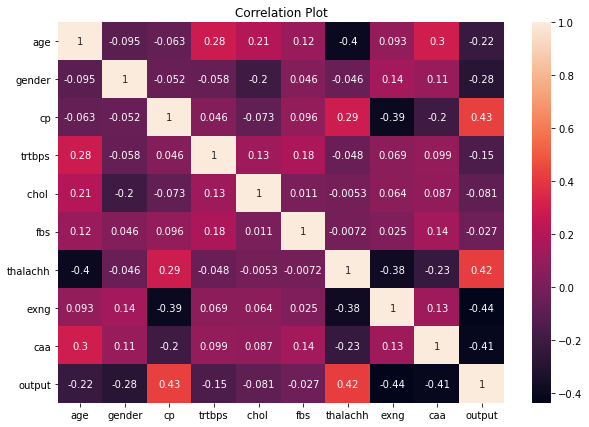

In [7]:
plt.figure(figsize=(10,7))
plt.title('Correlation Plot')
sns.heatmap(data.corr(), annot=True)

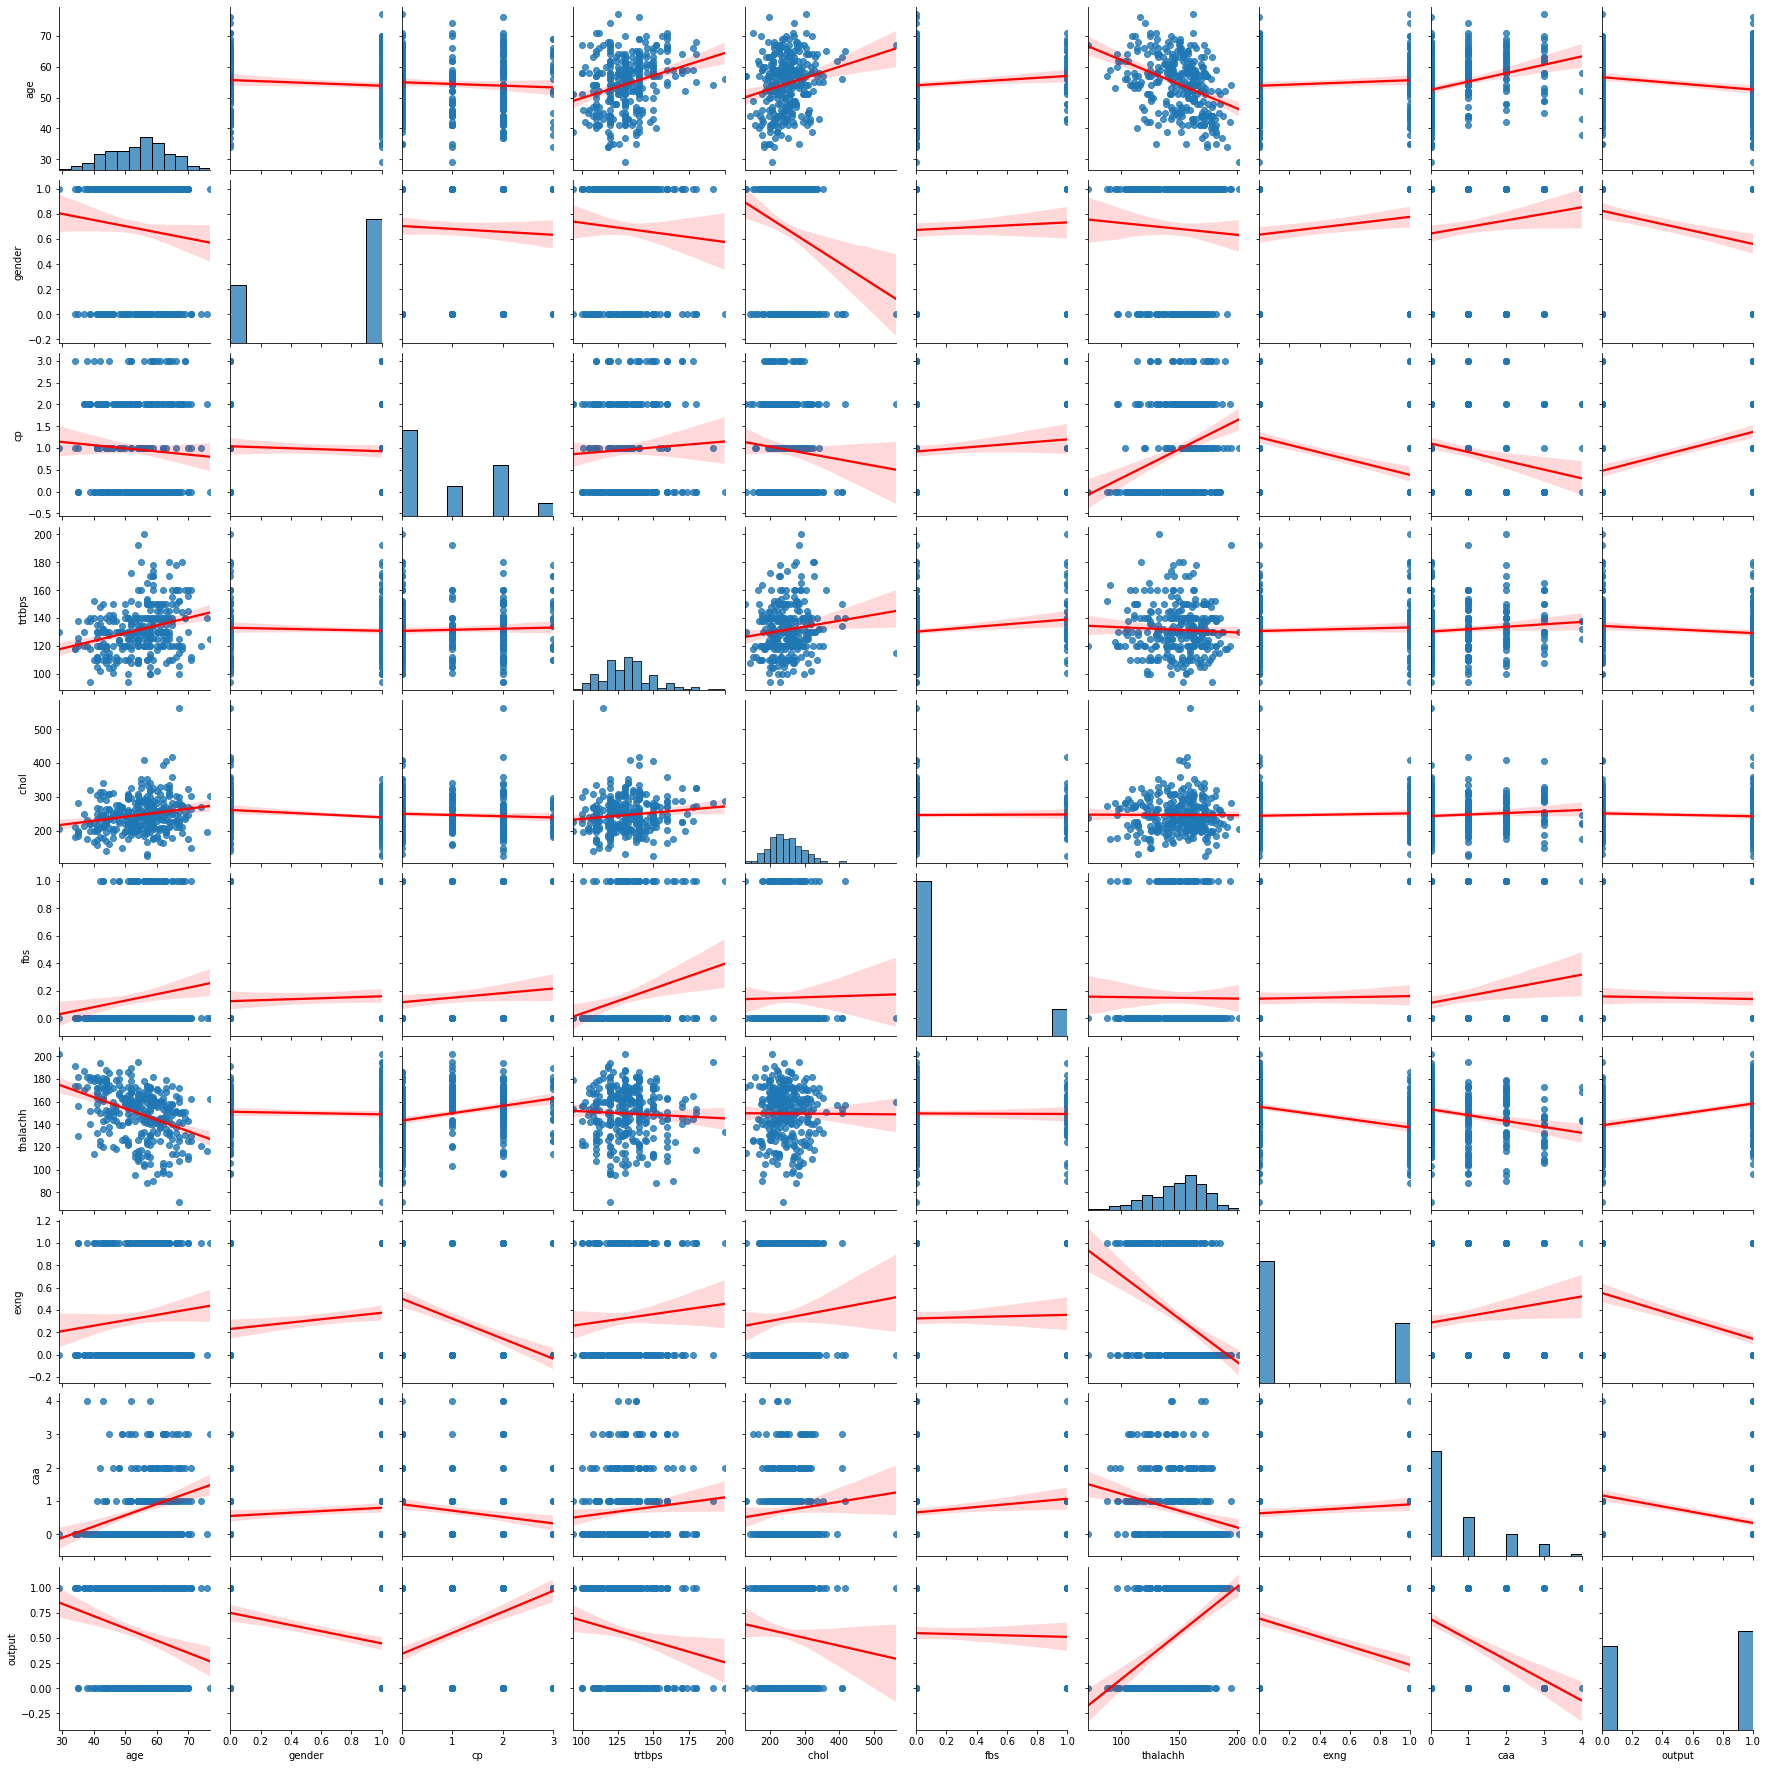

In [8]:
sns.pairplot(data, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [9]:
data_d = data.drop(columns= ['chol ','fbs','trtbps'])

#### Removing Outliers

In [10]:
Q1 = data_d.quantile(0.25)
Q3 = data_d.quantile(0.75)
IQR = Q3 - Q1
data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]


<ipython-input-10-0e0ce3450c5e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]
<ipython-input-10-0e0ce3450c5e>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_d = data_d[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 *IQR))).any(axis=1)]


#### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
X_2 = np.array(data_d['thalachh']).reshape(-1,1)
scaler_1 = MinMaxScaler()
scaler_1.fit(X_2)
X_2_scaled = scaler_1.transform(X_2) 
data_d['thalachh'] = X_2_scaled.reshape(1, -1)[0]

data_d

,age,gender,cp,thalachh,exng,caa,output
0,63,1,3,0.543860,0,0,1
1,37,1,2,0.868421,0,0,1
2,41,0,1,0.736842,0,0,1
3,56,1,1,0.789474,0,0,1
4,57,0,0,0.657895,1,0,1
...,...,...,...,...,...,...,...
298,57,0,0,0.307018,1,0,0
299,45,1,3,0.385965,0,0,0
300,68,1,0,0.464912,0,2,0
301,57,1,0,0.236842,1,1,0


## Model

In [12]:
x = data_d.drop(columns = 'output')
y = data_d['output']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [14]:
model.score(x_train, y_train)

0.8164251207729468

In [15]:
from sklearn import metrics

In [16]:
accuracy = metrics.accuracy_score(y_test, y_predict)

precision = metrics.precision_score(y_test, y_predict)

recall = metrics.recall_score(y_test, y_predict)

f1 = metrics.f1_score(y_test, y_predict)

print(f'Accuracy:{round(accuracy,3)}\nPrecision:{round(precision,2)}\nrecall:{round(recall,2)}\nF1:{round(f1,2)}')

Accuracy:0.829
Precision:0.84
recall:0.84
F1:0.84


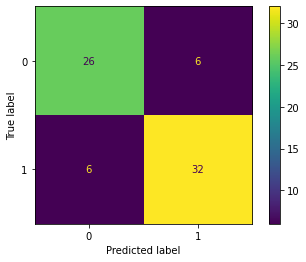

In [20]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(model, x_test, y_test)